In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [3]:
file_path = "accidents.csv"
accidents_data = pd.read_csv(file_path)

In [4]:
accidents_data['AccidentDate'] = pd.to_datetime(accidents_data['AccidentDate'], format='%d-%m-%Y')


In [5]:
timing_categories = {
    'Early Morning': ['Midnight', 'Early Morning'],
    'Morning': ['Morning'],
    'Afternoon': ['Afternoon'],
    'Evening': ['Evening'],
    'Night': ['Night']
}

In [6]:
def map_timing(timing):
    for key, values in timing_categories.items():
        if timing in values:
            return key
    return timing

In [7]:
accidents_data['TimingCategory'] = accidents_data['Timing'].apply(map_timing)

In [8]:
sns.set(style="whitegrid")

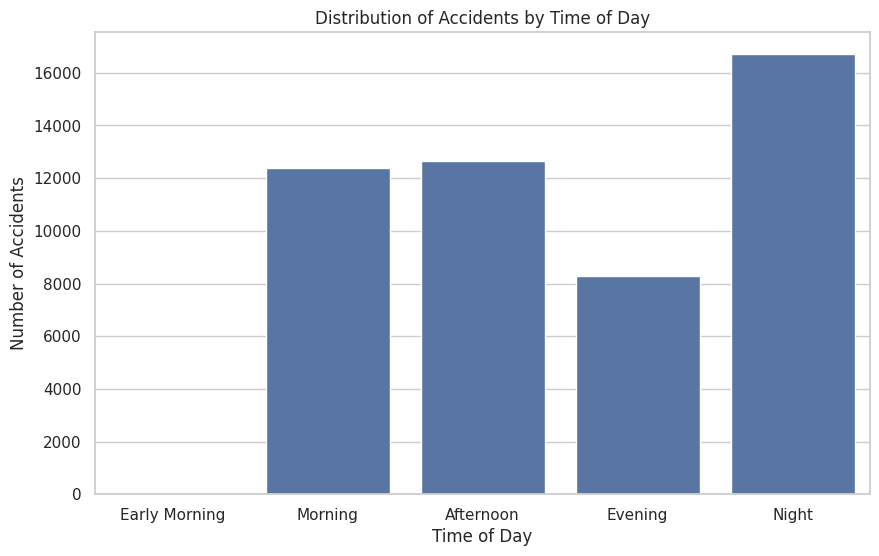

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TimingCategory', data=accidents_data, order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

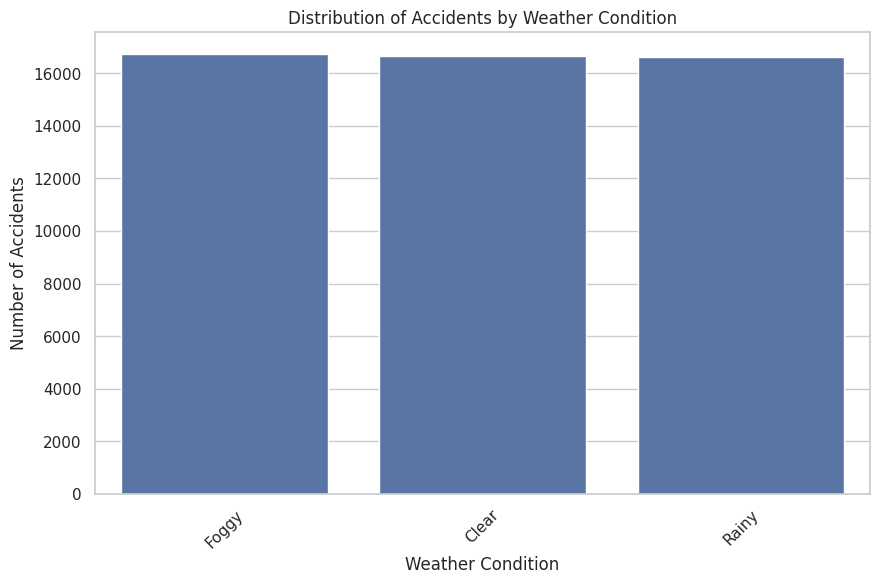

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WeatherCondition', data=accidents_data, order=accidents_data['WeatherCondition'].value_counts().index)
plt.title('Distribution of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

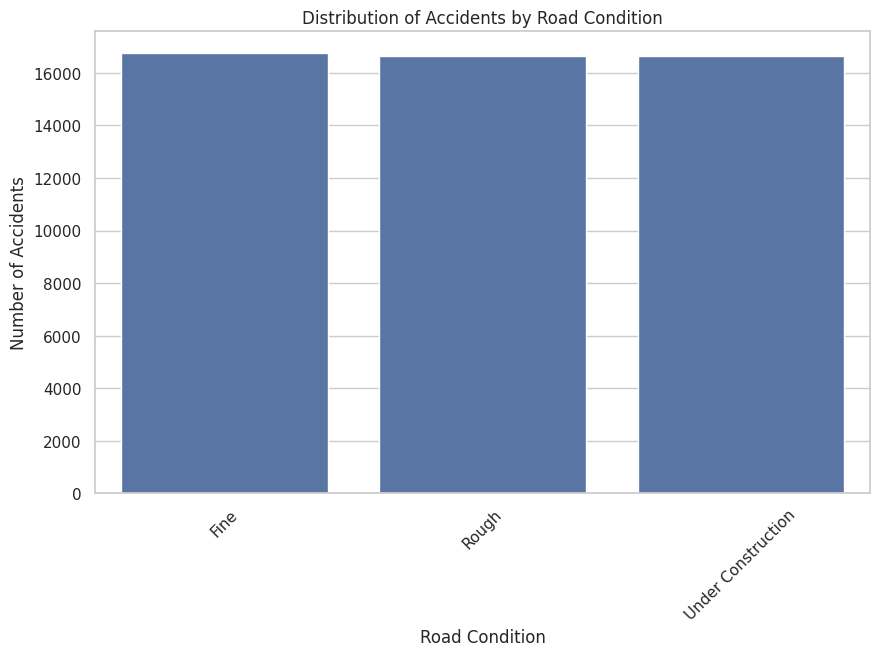

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RoadCondition', data=accidents_data, order=accidents_data['RoadCondition'].value_counts().index)
plt.title('Distribution of Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

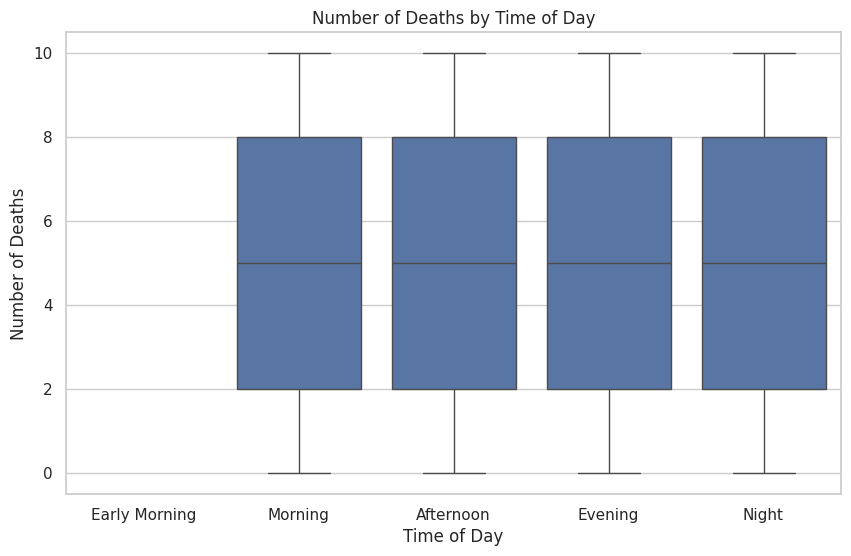

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TimingCategory', y='Deaths', data=accidents_data, order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Number of Deaths by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Deaths')
plt.show()

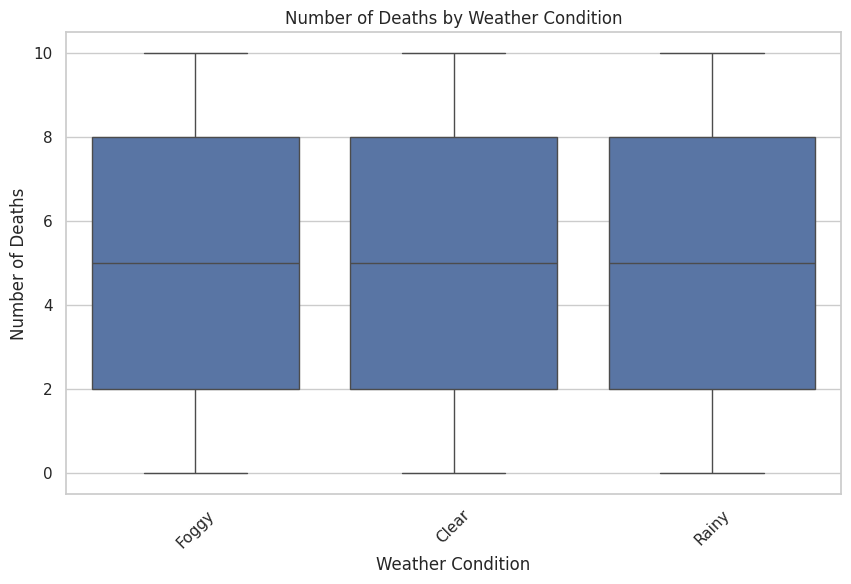

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='WeatherCondition', y='Deaths', data=accidents_data, order=accidents_data['WeatherCondition'].value_counts().index)
plt.title('Number of Deaths by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

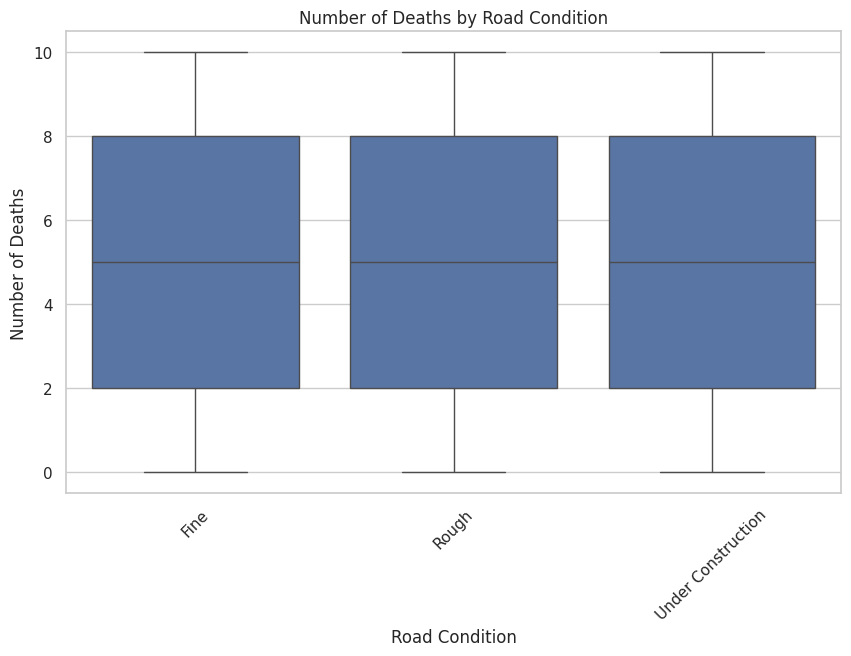

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RoadCondition', y='Deaths', data=accidents_data, order=accidents_data['RoadCondition'].value_counts().index)
plt.title('Number of Deaths by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

In [15]:
time_summary = accidents_data.groupby('TimingCategory').agg({'Deaths': ['mean', 'sum', 'count']})
weather_summary = accidents_data.groupby('WeatherCondition').agg({'Deaths': ['mean', 'sum', 'count']})
road_summary = accidents_data.groupby('RoadCondition').agg({'Deaths': ['mean', 'sum', 'count']})

In [16]:
print("Summary by Time of Day:")
print(time_summary)
print("\nSummary by Weather Condition:")
print(weather_summary)
print("\nSummary by Road Condition:")
print(road_summary)

Summary by Time of Day:
                  Deaths              
                    mean    sum  count
TimingCategory                        
Afternoon       4.991059  63077  12638
Evening         5.005794  41468   8284
Morning         5.010183  61996  12374
Night           4.945582  82611  16704

Summary by Weather Condition:
                    Deaths              
                      mean    sum  count
WeatherCondition                        
Clear             4.986918  83102  16664
Foggy             4.992468  83519  16729
Rainy             4.969651  82531  16607

Summary by Road Condition:
                      Deaths              
                        mean    sum  count
RoadCondition                             
Fine                4.976220  83287  16737
Rough               4.958110  82498  16639
Under Construction  5.014858  83367  16624


In [17]:
state_coords = {
    'Alabama': [32.806671, -86.791130],
    'Alaska': [61.370716, -152.404419],
    'Arizona': [33.729759, -111.431221],
    'Arkansas': [34.969704, -92.373123],
    'California': [36.116203, -119.681564],
    'Colorado': [39.059811, -105.311104],
    'Connecticut': [41.597782, -72.755371],
    'Delaware': [39.318523, -75.507141],
    'Florida': [27.766279, -81.686783],
    'Georgia': [33.040619, -83.643074],
    'Hawaii': [21.094318, -157.498337],
    'Idaho': [44.240459, -114.478828],
    'Illinois': [40.349457, -88.986137],
    'Indiana': [39.849426, -86.258278],
    'Iowa': [42.011539, -93.210526],
    'Kansas': [38.526600, -96.726486],
    'Kentucky': [37.668140, -84.670067],
    'Louisiana': [31.169546, -91.867805],
    'Maine': [44.693947, -69.381927],
    'Maryland': [39.063946, -76.802101],
    'Massachusetts': [42.230171, -71.530106],
    'Michigan': [43.326618, -84.536095],
    'Minnesota': [45.694454, -93.900192],
    'Mississippi': [32.741646, -89.678696],
    'Missouri': [38.456085, -92.288368],
    'Montana': [46.921925, -110.454353],
    'Nebraska': [41.125370, -98.268082],
    'Nevada': [38.313515, -117.055374],
    'New Hampshire': [43.452492, -71.563896],
    'New Jersey': [40.298904, -74.521011],
    'New Mexico': [34.840515, -106.248482],
    'New York': [42.165726, -74.948051],
    'North Carolina': [35.630066, -79.806419],
    'North Dakota': [47.528912, -99.784012],
    'Ohio': [40.388783, -82.764915],
    'Oklahoma': [35.565342, -96.928917],
    'Oregon': [44.572021, -122.070938],
    'Pennsylvania': [40.590752, -77.209755],
    'Rhode Island': [41.680893, -71.511780],
    'South Carolina': [33.856892, -80.945007],
    'South Dakota': [44.299782, -99.438828],
    'Tennessee': [35.747845, -86.692345],
    'Texas': [31.054487, -97.563461],
    'Utah': [40.150032, -111.862434],
    'Vermont': [44.045876, -72.710686],
    'Virginia': [37.769337, -78.169968],
    'Washington': [47.400902, -121.490494],
    'West Virginia': [38.491226, -80.954456],
    'Wisconsin': [44.268543, -89.616508],
    'Wyoming': [42.755966, -107.302490]
}

In [18]:
accidents_data['Coordinates'] = accidents_data['State'].map(state_coords)

accidents_data['Coordinates'] = accidents_data['Coordinates'].apply(tuple)

In [19]:
heat_data = accidents_data[accidents_data['Coordinates'] != (0, 0)]

heat_data = heat_data.groupby('Coordinates').size().reset_index(name='Accidents')

In [20]:
heat_data_list = [[coord[0], coord[1], accidents] for coord, accidents in zip(heat_data['Coordinates'], heat_data['Accidents'])]

In [22]:
map = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

HeatMap(heat_data_list).add_to(map)

map